In [13]:
import numpy as np
import cv2
import tensorflow
import matplotlib.pyplot as plt
import os
from numpy.random import shuffle
import pickle
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Activation, Flatten, Dense

# Load Data

In [14]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in.close()

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
pickle_in.close()


In [15]:
#I just want to shuffle the data differently every time so I am putting X and y into one list and then
#I will separate them again. This is just so that we have a different shuffle every time

concatenated = np.array([(X[i],y[i]) for i in range(y.shape[0])])
shuffle(concatenated)
X = np.array([features for features, labels in concatenated])
y = np.array([labels for features, labels in concatenated])

In [4]:
X[5].T[0].T.shape

(100, 100)

1

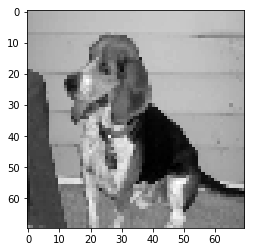

In [16]:
plt.imshow(X[7].T[0].T,cmap="gray")
y[7]

In [ ]:
X.shape[1:]

In [21]:
model = Sequential()
#optimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.add(Conv2D(filters = 64,kernel_size=(3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(31,strides = (3,3)))
#model.add(Dropout(rate=.5))

model.add(Conv2D(filters = 64,kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(strides = (3,3)))
#model.add(Dropout(rate=.5))

model.add(Conv2D(filters = 64,kernel_size = (3,3))
model.add(Activation('relu'))
model.add(MaxPool2D(strides = (2,2)))
#model.add(Dropout(rate=.3))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
             metrics=['accuracy'])
model.fit(X,y,batch_size = 32, epochs = 10, validation_split = .1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 471s 21ms/step - loss: 0.6509 - acc: 0.6054 - val_loss: 0.6068 - val_acc: 0.6721
Epoch 2/10
22451/22451 [==============================] - 369s 16ms/step - loss: 0.5662 - acc: 0.7079 - val_loss: 0.5327 - val_acc: 0.7275
Epoch 3/10
22451/22451 [==============================] - 287s 13ms/step - loss: 0.5324 - acc: 0.7332 - val_loss: 0.5087 - val_acc: 0.7507
Epoch 4/10
22451/22451 [==============================] - 299s 13ms/step - loss: 0.5133 - acc: 0.7507 - val_loss: 0.4907 - val_acc: 0.7579
Epoch 5/10
22451/22451 [==============================] - 305s 14ms/step - loss: 0.5016 - acc: 0.7540 - val_loss: 0.4817 - val_acc: 0.7695
Epoch 6/10
22451/22451 [==============================] - 300s 13ms/step - loss: 0.4910 - acc: 0.7644 - val_loss: 0.5120 - val_acc: 0.7491
Epoch 7/10
22451/22451 [==============================] - 310s 14ms/step - loss: 0.4819 - acc: 0.7685 - val_loss: 0.5

In [22]:
model.save('64x3-CNN.model')